In [9]:
# import package
from dateutil import rrule
import urllib.request
import matplotlib.pyplot as plt
import datetime
import pandas as pd
# import numpy as np
import json
import time
import ssl

stock = "0056"
begin_date = "2023-01-01"


%matplotlib inline

In [10]:

# 爬取每月股價的目標網站並包裝成函式
def craw_one_month(stock_number,date):
    url = (
        "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+
        date.strftime('%Y%m%d')+
        "&stockNo="+
        stock_number
    )
    headers={"User-Agent":"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36 QIHU 360SE"}
    ssl._create_default_https_context = ssl._create_unverified_context
    req = urllib.request.Request(url, headers=headers)
    data = json.loads(urllib.request.urlopen(req).read())
    return pd.DataFrame(data['data'],columns=data['fields'])



In [11]:
# 根據使用者輸入的日期，以月為單位，重複呼叫爬取月股價的函式
def craw_stock(stock_number, start_month):
    b_month = datetime.date(*[int(x) for x in start_month.split('-')])
    now = datetime.datetime.now().strftime("%Y-%m-%d")         # 取得現在時間
    e_month = datetime.date(*[int(x) for x in now.split('-')])

    result = pd.DataFrame()
    for dt in rrule.rrule(rrule.MONTHLY, dtstart=b_month, until=e_month):
        result = pd.concat([result,craw_one_month(stock_number,dt)],ignore_index=True)
        time.sleep(2000.0/1000.0)
    
    return result

df = craw_stock(stock, begin_date)
df.set_index("日期", inplace=True)

Text(0, 0.5, 'stock')

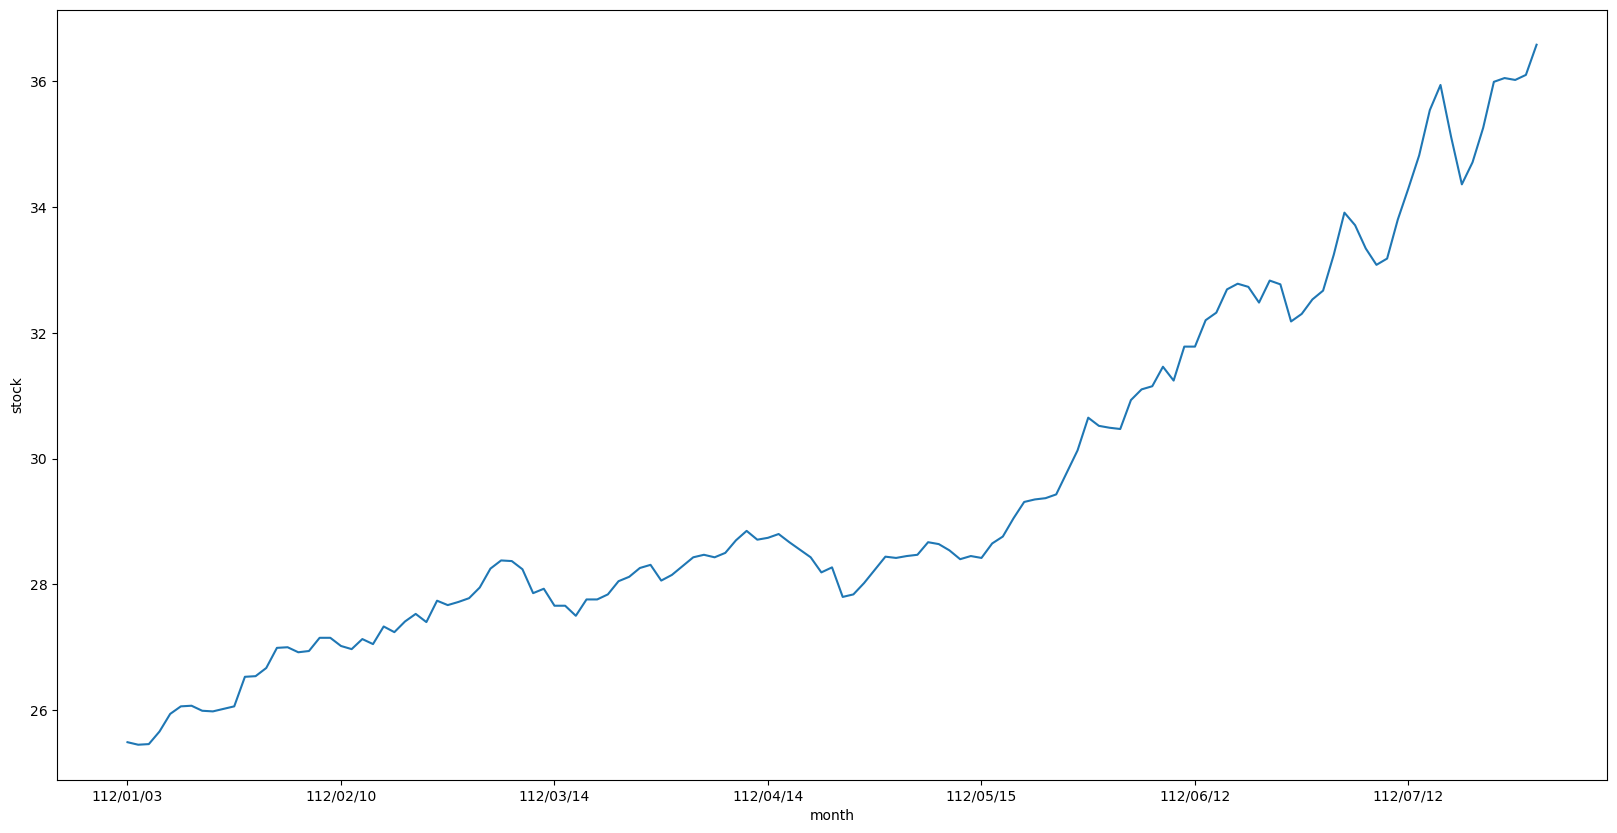

In [12]:
# 將爬取到的歷年股價資訊繪成圖表
df['收盤價']=df['收盤價'].astype(float)
df.loc[:]['收盤價'].plot(figsize=(20, 10))
plt.xlabel('month')
plt.ylabel('stock')
# Text(0, 0.5, 'stock')



In [13]:
df = df.drop(['成交金額'], axis=1)
df = df.drop(['成交股數'], axis=1)
df.to_csv(stock + '.csv', encoding='utf_8_sig')